In [1]:

from sklearn.model_selection import train_test_split
from sklearn import svm
import pandas as pd
from sklearn import preprocessing
import os
import json
import numpy as np
from pandas.io.json import json_normalize
import numpy as np
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
def load_df(csv_path='train.csv', nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'},
                     nrows=nrows)
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df

In [3]:
df_small = load_df(nrows=10000)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.


Loaded train.csv. Shape: (10000, 54)


In [4]:
df_small.to_csv("train-small-flattened.csv", index=False)

In [5]:
data = pd.read_csv('train-small-flattened.csv', sep=',')

In [6]:
list(data)

['channelGrouping',
 'date',
 'fullVisitorId',
 'sessionId',
 'socialEngagementType',
 'visitId',
 'visitNumber',
 'visitStartTime',
 'device.browser',
 'device.browserVersion',
 'device.browserSize',
 'device.operatingSystem',
 'device.operatingSystemVersion',
 'device.isMobile',
 'device.mobileDeviceBranding',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.flashVersion',
 'device.language',
 'device.screenColors',
 'device.screenResolution',
 'device.deviceCategory',
 'geoNetwork.continent',
 'geoNetwork.subContinent',
 'geoNetwork.country',
 'geoNetwork.region',
 'geoNetwork.metro',
 'geoNetwork.city',
 'geoNetwork.cityId',
 'geoNetwork.networkDomain',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'totals.visits',
 'totals.hits',
 'totals.pageviews',
 'totals.bounces',
 'totals.newVisits',
 'totals.transactionRevenue',
 'trafficSource.campaign',
 'trafficSource.s

In [7]:
new_data=data[['totals.visits','totals.hits','totals.transactionRevenue','geoNetwork.country',
              'device.operatingSystem','visitNumber','totals.pageviews','socialEngagementType','totals.newVisits']].copy()
print(new_data)

      totals.visits  totals.hits  totals.transactionRevenue  \
0                 1            1                        NaN   
1                 1            1                        NaN   
2                 1            1                        NaN   
3                 1            1                        NaN   
4                 1            1                        NaN   
...             ...          ...                        ...   
9995              1            4                        NaN   
9996              1            4                        NaN   
9997              1            4                        NaN   
9998              1            4                        NaN   
9999              1            4                        NaN   

     geoNetwork.country device.operatingSystem  visitNumber  totals.pageviews  \
0                Turkey                Windows            1                 1   
1             Australia              Macintosh            1                 1   


In [8]:
new_data=new_data.replace(np.nan,0)

In [9]:

le = preprocessing.LabelEncoder()
y=np.log(new_data['totals.transactionRevenue'])
y = le.fit_transform(y)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
new_data['geoNetwork.country'] = le.fit_transform(new_data['geoNetwork.country'])
new_data['device.operatingSystem'] = le.fit_transform(new_data['device.operatingSystem'])
new_data['socialEngagementType'] = le.fit_transform(new_data['socialEngagementType'])
new_data.describe()

,totals.visits,totals.hits,totals.transactionRevenue,geoNetwork.country,device.operatingSystem,visitNumber,totals.pageviews,socialEngagementType,totals.newVisits
count,10000.0,10000.000000,1.000000e+04,10000.00000,10000.000000,10000.000000,10000.00000,10000.0,10000.000000
mean,1.0,4.224900,1.065414e+06,96.54930,7.089000,2.167300,3.55770,0.0,0.770100
std,0.0,8.505819,1.991012e+07,43.48423,3.375088,7.862283,6.21121,0.0,0.420789
min,1.0,1.000000,0.000000e+00,0.00000,0.000000,1.000000,1.00000,0.0,0.000000
25%,1.0,1.000000,0.000000e+00,53.00000,6.000000,1.000000,1.00000,0.0,1.000000
50%,1.0,1.000000,0.000000e+00,126.00000,9.000000,1.000000,1.00000,0.0,1.000000
75%,1.0,3.000000,0.000000e+00,132.00000,9.000000,1.000000,3.00000,0.0,1.000000
max,1.0,189.000000,1.077000e+09,137.00000,12.000000,317.000000,138.00000,0.0,1.000000


In [11]:
X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size=0.2)

In [42]:
modelSVM = svm.SVC(kernel='linear', C=100, gamma=10) 
modelSVM.fit(X_train, y_train)
modelSVM.score(X_train, y_train)
predictSVM = modelSVM.predict(X_test)
scoreSVM = modelSVM.score(X_test, y_test)
print(scoreSVM)

0.9925


In [43]:
modelRegr = linear_model.LinearRegression()
modelRegr.fit(X_train, y_train)
modelRegr.score(X_train, y_train)
predictRegr = modelRegr.predict(X_test)
scoreRegr = modelRegr.score(X_test, y_test)
print(scoreRegr)

0.7252745648409481


In [44]:
modelRanFor = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt')
modelRanFor.fit(X_train, y_train)
modelRanFor.score(X_train, y_train)
predictRanFor = modelRanFor.predict(X_test)
scoreRanFor = modelRanFor.score(X_test, y_test)
print(scoreRanFor)

0.9915


In [45]:
modelGBM = GradientBoostingRegressor(n_estimators=500, max_depth=4)
modelGBM.fit(X_train, y_train)
modelGBM.score(X_train, y_train)
predictGBM = modelGBM.predict(X_test)
scoreGBM = modelGBM.score(X_test, y_test)
print(scoreGBM)

0.9996491570482611


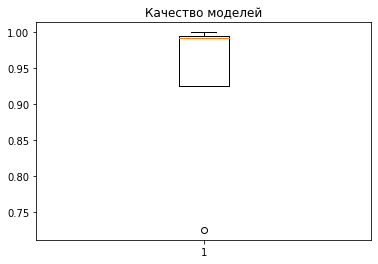

In [46]:
fig, ax = plt.subplots()
Data = [scoreSVM, scoreRegr, scoreRanFor, scoreGBM]
ax.set_title('Качество моделей')
ax.boxplot(Data)
plt.show()

In [47]:
cvscoreSVM = cross_val_score(modelSVM, X_test, y_test, cv=None).mean()
print(cvscoreSVM)

0.9915


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [48]:
cvscoreRegr = cross_val_score(modelRegr, X_test, y_test, cv=None).mean()
print(cvscoreRegr)

0.37470663287701694


In [49]:
cvscoreRanFor = cross_val_score(modelRanFor, X_test, y_test, cv=None).mean()
print(cvscoreRanFor)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


0.9915


In [50]:
cvscoreGBM = cross_val_score(modelGBM, X_test, y_test, cv=None).mean()
print(cvscoreGBM)

0.9620896816752145


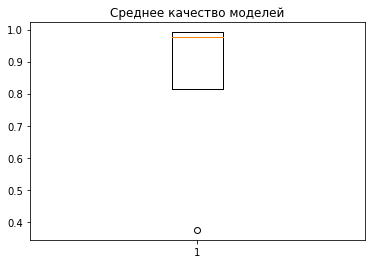

In [60]:
fig1, ax1 = plt.subplots()
Data2 = [cvscoreSVM, cvscoreRegr, cvscoreRanFor, cvscoreGBM]
ax1.set_title('Среднее качество моделей')
ax1.boxplot(Data2)
plt.show()

In [64]:
DispSVM = np.var(cross_val_score(modelSVM, X_test, y_test, cv=20))
print(DispSVM)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=20.
  % (min_groups, self.n_splits)), UserWarning)


1.2750000000000022e-05


In [55]:
DispRegr = np.var(cross_val_score(modelRegr, X_test, y_test, cv=20))
print(DispRegr)

0.1355782888201209


In [56]:
DispRanFor = np.var(cross_val_score(modelRanFor, X_test, y_test, cv=20))
print(DispRanFor)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=20.
  % (min_groups, self.n_splits)), UserWarning)


1.2750000000000022e-05


In [57]:
DispGBM = np.var(cross_val_score(modelGBM, X_test, y_test, cv=20))
print(DispGBM)

0.22641322486238008


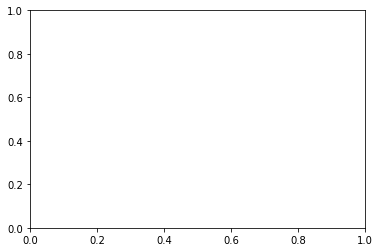

In [65]:
fig2, ax2 = plt.subplots()
Data3 = [DispSVM, DispRegr, DispRanFor, DispGBM]
ax1.set_title('Оценка дисперсии')
ax1.boxplot(Data3)
plt.show()